In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print("Train data:  {}, {}".format(train_images.shape, train_labels.shape))
print("Test data:  {}, {}".format(test_images.shape, test_labels.shape))

Train data:  (60000, 28, 28), (60000,)
Test data:  (10000, 28, 28), (10000,)


In [5]:
class_labels = np.unique(train_labels)

print(f"There are {len(class_labels)} unique labels in the dataset. They are {class_labels}")

There are 10 unique labels in the dataset. They are [0 1 2 3 4 5 6 7 8 9]


### **VISUALIZE THE IMAGES**

In [6]:
plt.figure(figsize=(8, 5));

<Figure size 800x500 with 0 Axes>

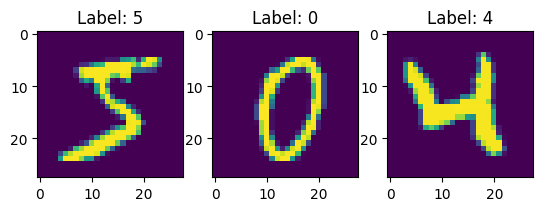

In [9]:
plt.subplot(1, 3, 1)
plt.imshow(train_images[0]);
plt.title(f"Label: {train_labels[0]}");

plt.subplot(1, 3, 2)
plt.imshow(train_images[1000]);
plt.title(f"Label: {train_labels[1000]}");

plt.subplot(1, 3, 3)
plt.imshow(train_images[20]);
plt.title(f"Label: {train_labels[20]}");

### **SCALE THE DATA**

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### **SPLIT TRAINING DATA TO TRAINING AND VALIDATION SETS**

In [11]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]


print(f"x_train: {x_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


### **RESHAPE DATA FROM 28 * 28 ARRAY TO A SINGLE ARRAY**

In [12]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [13]:
print(f"x_train: {x_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"test_images: {test_images.shape}")

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


### **ENCODE LABELS TO CATEGORICAL VARIABLES**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)    
y_test = to_categorical(test_labels, no_labels)

### **ACTIVATION FUNCTIONS AND NEURAL NETWORKS HYPERPARAMETERS**

In [16]:
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [17]:
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    # first layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    
    # second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    
    # output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    
    return logits

### **CALL THE MULTILAYER PERCEPTION FUNCTION**

In [18]:
logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer()

epochs = 20
batch_size = 100
iteration = len(x_train) // batch_size

with tf.Session() as session:
    session.run(init)
    
    for epoch in range(epochs):
        average_cost = 0
        start, end = 0, batch_size
        
        for i in range(iteration):
            batch_x, batch_y = x_train[start: end], y_train[start: end]
            _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
            start += batch_size
            end += batch_size
            average_cost += loss / iteration
            
        print(f"Epoch========{epoch}")

    prediction = tf.nn.softmax(logits)
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Accuracy: ", accuracy.eval({X: x_val, Y: y_val}))





Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy:  0.9514
